# C Bate - Reas. Comp. Assignment 3

## 1. Creating and manipulating arrays

In [4]:
import numpy as np
from matplotlib import pyplot as plt

### 1.1. Create two 2D arrays representing coordinates x, y on the cartesian plan

In [9]:
# Both should cover the range (-2, 2) and have 100 points in each direction

x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)

xx,yy = np.meshgrid(x,y)

# # creating grid (lat long, etc.)
# x = np.linspace(-2*np.pi,np.pi,100)
# y = np.linspace(-np.pi, 2*np.pi, 50)
# xx,yy = np.meshgrid(x,y)

### 1.2. Visualize each 2D array using pcolormesh

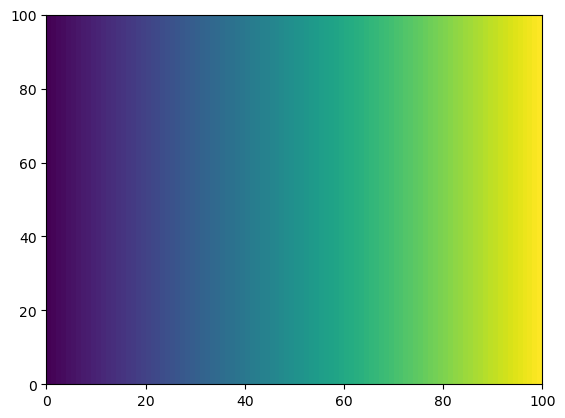

In [13]:
plt.pcolormesh(xx)

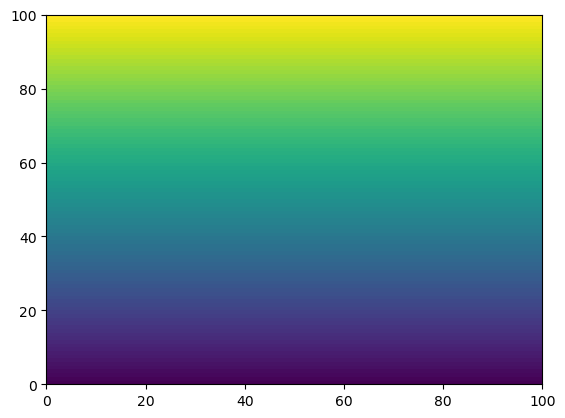

In [14]:
plt.pcolormesh(yy)

In [19]:
rr = np.sqrt(xx**2+yy**2)
phi = np.arctan2(yy,xx)

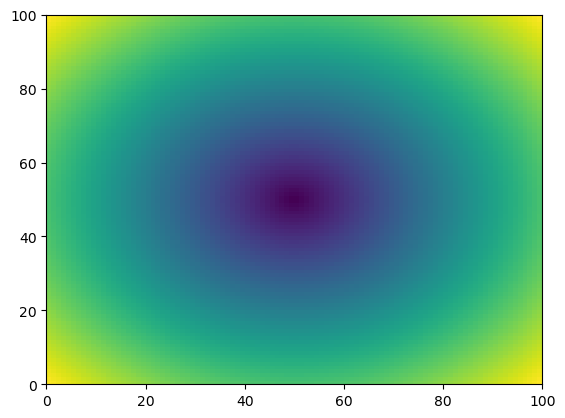

In [22]:
plt.pcolormesh(rr)

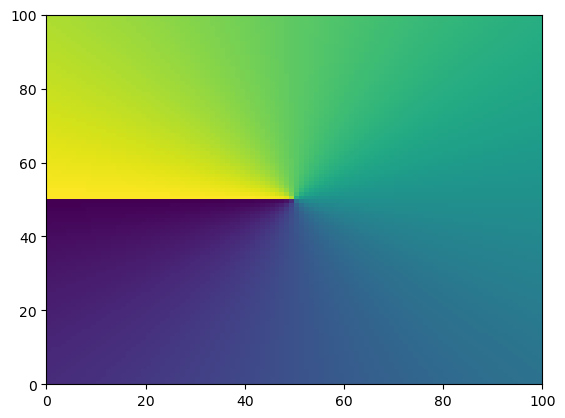

In [23]:
plt.pcolormesh(phi)

In [24]:
f = np.cos(4*rr)**2 + np.sin(4*phi)**2

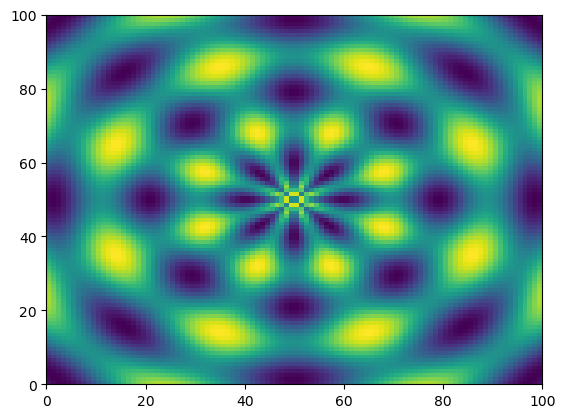

In [25]:
plt.pcolormesh(f)

Text(0, 0.5, 'Mean value of column of f')

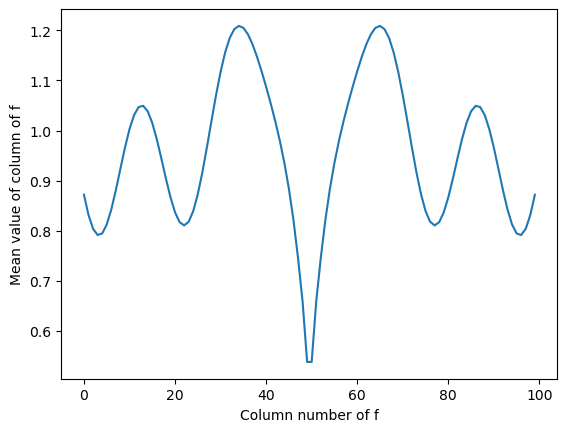

In [38]:
f_ymean = np.mean(f,axis=0) # take mean of each column (of y values at each x value)
plt.plot(f_ymean)
plt.xlabel('Column number of f')
plt.ylabel('Mean value of column of f')

Text(0, 0.5, 'Mean value of row of f')

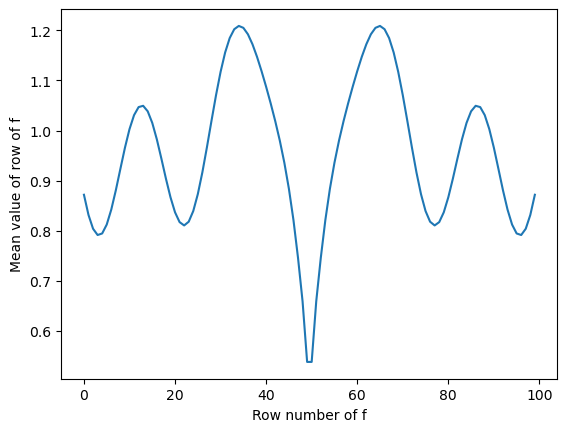

In [40]:
f_xmean = np.mean(f,axis=1) # take mean of each row (of x values at each y value)
plt.plot(f_xmean)
plt.xlabel('Row number of f')
plt.ylabel('Mean value of row of f')

## 1.8 Plot the mean of f with respect to phi as a function of r

In [42]:
# This is hard. You will need to define a discrete range of r values and then figure out how to 
# average f within the bins defined by your r grid. There are many different ways to accomplish this.

# Part 2: Analyze ARGO Data

In [1]:
import pooch
url = "https://www.ldeo.columbia.edu/~rpa/float_data_4901412.zip"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash="2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009")
files

['/home/ceb2268/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/date.npy',
 '/home/ceb2268/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/T.npy',
 '/home/ceb2268/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/S.npy',
 '/home/ceb2268/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/P.npy',
 '/home/ceb2268/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/levels.npy',
 '/home/ceb2268/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/lon.npy',
 '/home/ceb2268/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/lat.npy']

In [6]:
T = np.load('T.npy')
S = np.load('S.npy')
P = np.load('P.npy')
date = np.load('date.npy')
lat = np.load('lat.npy')
lon = np.load('lon.npy')
level = np.load('levels.npy')

In [21]:
print('T:',T.shape)
print('S:',S.shape)
print('P:',P.shape)
print('date:',date.shape)
print('lat:',lat.shape)
print('lon:',lon.shape)
print('level:',level.shape)

T: (78, 75)
S: (78, 75)
P: (78, 75)
date: (75,)
lat: (75,)
lon: (75,)
level: (78,)


In [22]:
# Each column of T, S, and P corresponds to a single date and spatial coordinate (latitude & longitude). There are 75 columns, 
# each containing 78 data points corresponding to 78 levels.

## 2.3 Make a plot for each column of data in T, S and P (three plots).

In [34]:
# The vertical scale should be the levels data. Each plot should have a line for each column of data. It will look messy.

Text(0.5, 1.0, 'ARGO float temperature profiles')

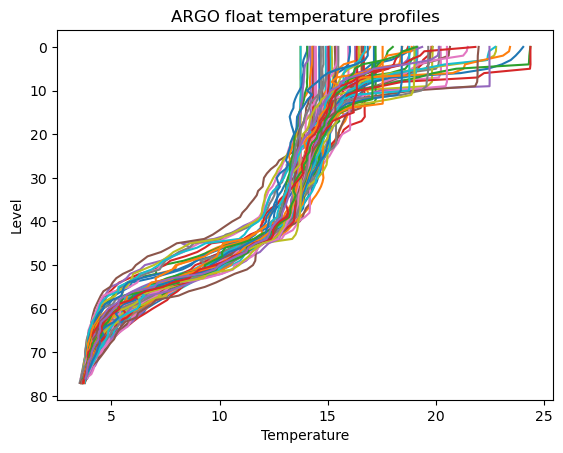

In [59]:
# I want to plot each column vs level

d = len(T[1, :]) # number of columns (separate date and coords)
n = len(T[:, 1]) # number of rows (data points per date and coords) 


for i in range(0, d):
   plt.plot(T[:,i],level)

plt.gca().invert_yaxis()
plt.xlabel('Temperature')
plt.ylabel('Level')
plt.title('ARGO float temperature profiles')

# plt.plot(T[0,)

# logger = logging.getLogger('my_module_name')
# as before
# plt.plot(lon,S)
# plt.plot(lon,P)

# plt.plot(t1869, label='1869')
# plt.plot(t2023,label='2023')
# plt.legend()
# plt.xlabel('day of the year')
# plt.ylabel('Temp [F]')

Text(0.5, 1.0, 'ARGO float salinity profiles')

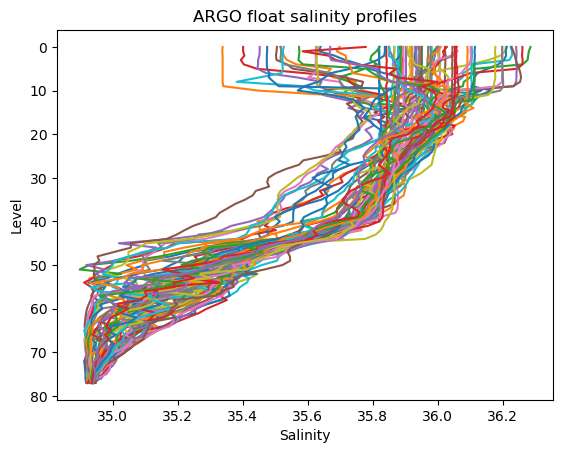

In [60]:
for i in range(0, d):
   plt.plot(S[:,i],level)

plt.gca().invert_yaxis()
plt.xlabel('Salinity')
plt.ylabel('Level')
plt.title('ARGO float salinity profiles')

Text(0.5, 1.0, 'ARGO float pressure profiles')

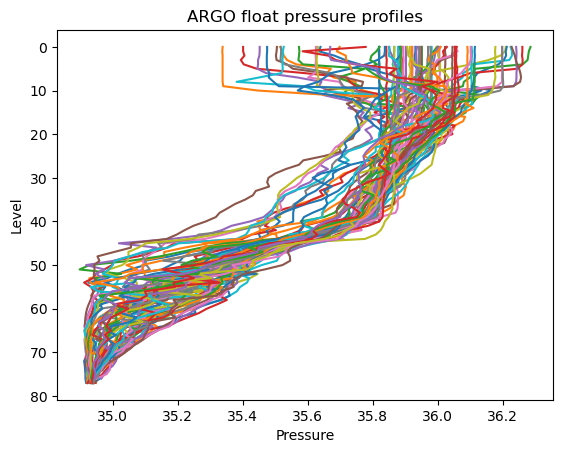

In [61]:
for i in range(0, d):
   plt.plot(S[:,i],level)

plt.gca().invert_yaxis()
plt.xlabel('Pressure')
plt.ylabel('Level')
plt.title('ARGO float pressure profiles')

## 2.4 Compute the mean and standard deviation of each of T, S and P at each depth in level

In [75]:
# gmean = np.mean(g)

# from scipy import stats

# d = len(T[1, :] # number of columns (separate date and coords)
# n = len(T[:, 1]) # number of rows (data points per date and coords) 

Tmean = np.zeros((n,1))
Tstd = np.zeros((n,1))

for i in range(0,n):
    Tmean[i] = np.nanmean(T[i,:])
    Tstd[i] = np.nanstd(T[i,:])

Smean = np.zeros((n,1))
Sstd = np.zeros((n,1))

for i in range(0,n):
    Smean[i] = np.nanmean(S[i,:])
    Sstd[i] = np.nanstd(S[i,:])

Pmean = np.zeros((n,1))
Pstd = np.zeros((n,1))

for i in range(0,n):
    Pmean[i] = np.nanmean(P[i,:])
    Pstd[i] = np.nanstd(P[i,:])

## 2.5 Now make three similar plots, but show only the mean T, S and P at each depth. Show error bars on each plot using the standard deviations.

Text(0.5, 1.0, 'ARGO float mean temperature profiles')

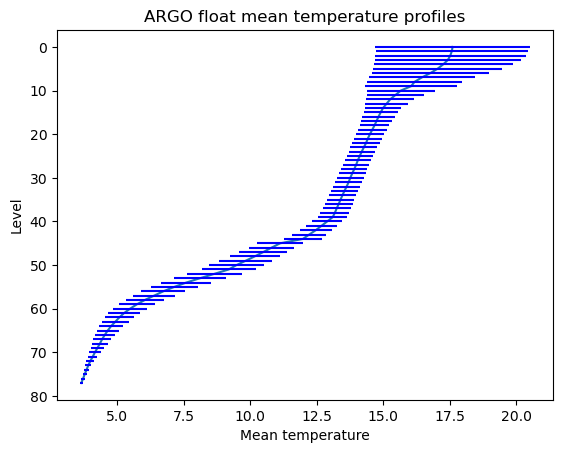

In [85]:
plt.plot(Tmean,level)

plt.gca().invert_yaxis()
for i in range(0,n):
    plt.errorbar(Tmean[i],level[i],yerr = None, xerr = Tstd[i],ecolor='b')
plt.xlabel('Mean temperature')
plt.ylabel('Level')
plt.title('ARGO float mean temperature profiles')


# matplotlib.pyplot.errorbar(x, y, yerr=None, xerr=None)

Text(0.5, 1.0, 'ARGO float mean salinity profiles')

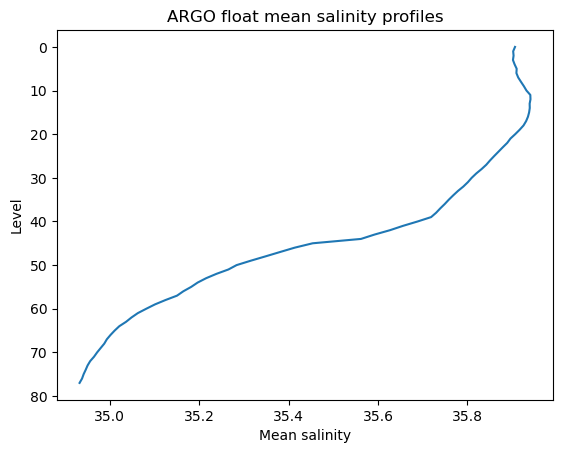

In [81]:
plt.plot(Smean,level)

plt.gca().invert_yaxis()
plt.xlabel('Mean salinity')
plt.ylabel('Level')
plt.title('ARGO float mean salinity profiles')

Text(0.5, 1.0, 'ARGO float mean pressure profiles')

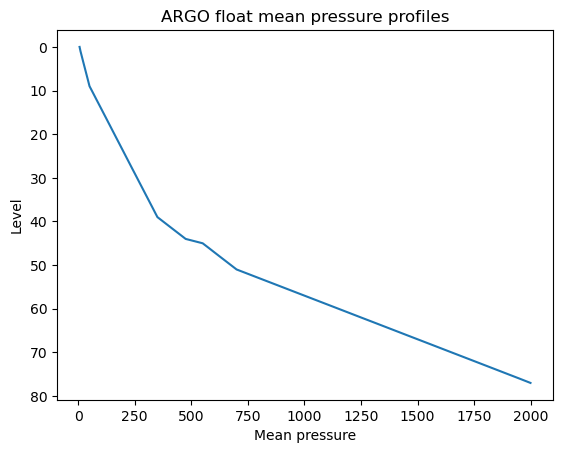

In [82]:
plt.plot(Pmean,level)

plt.gca().invert_yaxis()
plt.xlabel('Mean pressure')
plt.ylabel('Level')
plt.title('ARGO float mean pressure profiles')